# Restauración de Imágenes (Image Restauration)
* Martín Bojorque
* Iván Ulloa

##Evolución de la técnica

Una de las primeras problemáticas que se presentaron al moverse en el territorio de la comunicación digital fue la restauración de una imagen contaminada por ruido gaussiano blanco aditivo (AWGN) en la década de 1940. Para esto la teoría de filtrado de Wiener-Kolmogorov fue el primer resultado riguroso dentro del diseño de filtros estadísticamente óptimos para la clase de procesos gaussianos estacionarios (Gunturk,2018)
En la década de 1970 debido a las señales bidimensionales, como las imágenes digitales, los esfuerzos de evolución e investigación dentro de este tema tomaron más relevancia. Uno de los registros de una técnica afín es la de movimiento de la imagen. La técnica de movimiento de imagen busca determinar la viabilidad de la restauración de fotografías que ven afectadas durante la exposición mediante el movimiento relativo entre el cámara y toda la escena que se fotografía (Slepian, 1967). Pero esta no fue la única solución basada en la restauración de imágenes debido al movimiento; el método de la imagen variante espacial; la cual se basa en la descomposición de la degradación en distorsiones de coordenadas geométricas y una operación invariante en el espacio (Sawchuk, 1972).
Una nueva teoría fue presentada y adoptada de manera independiente por matemáticos, informáticos e ingenieros eléctricos en la década de 1980; la teoría ondícula (Wavelet) (Kervrann & Boulanger, 2008) 
Se desarrollo un marco para el procesamiento de señales estadísticas basado en modelos ocultos de Markov (HMM) de dominio de wavelet; este modela de manera concisa las dependencias estadísticas y las estadísticas no gaussianas (Crouse et all, 1998). Estas últimas técnicas dieron pie a varios modelos que siguen evolucionando a través del tiempo.
Técnicas actuales

## Filtro de la media
Este filtro se considera un método estadístico, en este se encuentra la mediana del pixel y se reemplaza y reemplazamos por la mediana de los niveles de gris de los pixeles en su alrededor. Suele ser de utilidad para eliminar el ruido sal y pimienta (Tiwari et all,2014)
## Filtro adaptativo

Este es un filtro lineal cuya funcionalidad es la de una transferencia controlada mediante parámetros variables. Este usa el espacio gris y color para eliminar el ruido impulsivo en las imágenes. Este proporciona un mejor resultado de supresión de ruido y una mejoría para conservar los bordes, las líneas finas y los detalles de la imagen.(Rani et all, 2016)
## Filtro lineal

El proceso de este filtro consiste en reemplazar el pixel con una combinación lineal de su alrededor. Se implementan operaciones de procesamiento de imágenes con filtro lineal incluye nitidez, suavizado y mejora de bordes. Aquí la salida depende linealmente de la entrada. (Rani et all, 2016)
## IBD (Des convolución ciega iterativa)

Este método se basa en la Transformada de Fourier esto desatando una mejor eficiencia. En este método, la degradante PSF desconoce o se conoce muy poco de ella. El resultado obtenido presenta una más alta resolución y mejor calidad. Este método no está garantizado. (Ayers et all, 1988)
## NAS-RIF (Nonnegative and Support Constraints Recursive Inverse Filtering)

Este método realiza, en base a una imagen dada, una estimación de la imagen final. La estimación se realiza minimizando una función dada de error, esta tiene el dominio de la imagen e información no negativa de píxeles. Una ventaja es que son opcionales los parámetros de PSF y la información a priori de imagen original, solo es necesario determinar el dominio de soporte de área de destino y asegurarse de que la estimación de la imagen es no negativa. Una desventaja presente es que es sensible al ruido, por lo que únicamente es adecuado para imágenes con simetría (Kundur et all,1996)
## Enfoque de red neuronal

Este método se basa en un sistema informático multiprocesador, esto se logra con elementos de procesamiento simples como lo es un grupo interconectado de nodos. A estos últimos se les llaman neuronas; estas envían mensajes de una a otra. (Neeraj et all,2012)

## Red Neuronal a Utilizarse
Fusión de funciones compuestas de varias ramas para la restauración de imágenes reales

Se utilizará un modelo de restauración conformado de múltiples ramas con inspiración en el sistema visual humano; en otras palabras, células ganglionares de la retina. Las tareas que esta red puede realizar están relacionadas con: desenfoque de imágenes, eliminación de neblina y eliminación de lluvia.
La arquitectura de la red compuesta de fusión de características de múltiples ramas (CMFNet) se ilustra en la siguiente imagen.

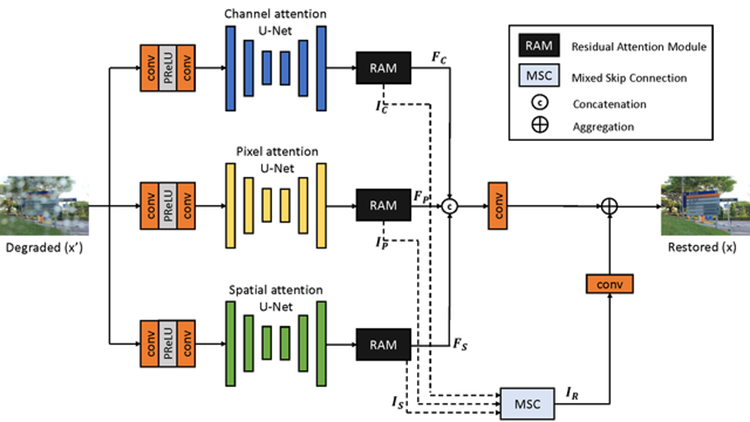

CMFNet consta de tres ramas que simulan las células P, las células M y las células K. Se basa en U-Net  y se usa diferentes bloques de atención para reemplazar circunvoluciones ingenuas en cada rama. Las características de salida de las redes de sucursales de codificador-decodificador ingresarán al Módulo de Atención Residual(RAM) que se obtiene eliminando el cálculo de pérdida. Y se reemplaza las convoluciones de 1 × 1 en el SAM original con convoluciones de 3 × 3.
Luego, cada RAM generará dos salidas, donde image.png denota el mapa de características generado por la máscara (M) obtenida al pasar la imagen IC a través del sigmoide, y image.png denota la imagen de salida obtenida al pasar la imagen degradada a través de una convolución de 3 × 3. El IC, IP e IS de tres sucursales serán alimentado en la conexión de salto mixto (MSC) para obtener la imagen residual IR. Finalmente, IR y las funciones de fusión concatenadas (FC, FP y FS) pasarán por una convolución de 3 × 3 para agregarse a la imagen restaurada. (Fan et all, 2022)




---
# **Importante!**

# **Es necesario descargar el archivo de pesos "deraindrop_model.pth", dentro de la carpeta "pretrained_model". Utilizable unicamente con gpu puesto que usa un modelo CUDA. Ver archivo README.md en la carpeta "pretrained_model". Es necesario descargar primero el repositorio de github y realizar esta configuracion para seguir**



---



In [ ]:
!git clone https://github.com/FanChiMao/CMFNet
!mv CMFNet/* ./

In [ ]:
!pip install utils pytorch-msssim thop onnx
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from PIL import Image
import os

from skimage import img_as_ubyte
from collections import OrderedDict
from natsort import natsorted
from glob import glob
import cv2
import argparse
from model.CMFNet import CMFNet
import utils
model = CMFNet()

parser = argparse.ArgumentParser(description='Demo Image Restoration')
parser.add_argument('--input_dir', default='./demo_samples/deraindrop', type=str, help='Input images folder')
parser.add_argument('--result_dir', default='./demo_results', type=str, help='Directory for results')
parser.add_argument('--weights', default='./pretrained_model/deraindrop_model.pth', type=str, help='Path to weights')

args = parser.parse_args("")

def save_img(filepath, img):
    cv2.imwrite(filepath, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

def load_checkpoint(model, weights):
    checkpoint = torch.load(weights)
    try:
        model.load_state_dict(checkpoint["state_dict"])
    except:
        state_dict = checkpoint["state_dict"]
        new_state_dict = OrderedDict()
        for k, v in state_dict.items():
            name = k[7:]  # remove `module.`
            new_state_dict[name] = v
        model.load_state_dict(new_state_dict)

inp_dir = args.input_dir
out_dir = args.result_dir

os.makedirs(out_dir, exist_ok=True)

files = natsorted(glob(os.path.join(inp_dir, '*.jpg'))
                  + glob(os.path.join(inp_dir, '*.JPG'))
                  + glob(os.path.join(inp_dir, '*.png'))
                  + glob(os.path.join(inp_dir, '*.PNG')))

if len(files) == 0:
    raise Exception(f"No files found at {inp_dir}")

# Cargar la arquitectura y los pesos
model = CMFNet()
model.cuda()

load_checkpoint(model, args.weights)
model.eval()

img_multiple_of = 8
print('restoring images......')
for file_ in files:
    img = Image.open(file_).convert('RGB')
    input_ = TF.to_tensor(img).unsqueeze(0).cuda()

    # Rellenar la entrada si no es múltiplo de 8 (not_multiple_of 8)
    h, w = input_.shape[2], input_.shape[3]
    H, W = ((h + img_multiple_of) // img_multiple_of) * img_multiple_of, (
                (w + img_multiple_of) // img_multiple_of) * img_multiple_of
    padh = H - h if h % img_multiple_of != 0 else 0
    padw = W - w if w % img_multiple_of != 0 else 0
    input_ = F.pad(input_, (0, padw, 0, padh), 'reflect')

    with torch.no_grad():
        restored = model(input_)
    restored = restored[0]
    restored = torch.clamp(restored, 0, 1)

    # Restaurar la salida
    restored = restored[:, :, :h, :w]

    restored = restored.permute(0, 2, 3, 1).cpu().detach().numpy()
    restored = img_as_ubyte(restored[0])

    f = os.path.splitext(os.path.split(file_)[-1])[0]
    save_img((os.path.join(out_dir, f + '.png')), restored)

print(f"Files saved at {out_dir}")
print('finish !')

Cloning into 'CMFNet'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 476 (delta 22), reused 30 (delta 12), pack-reused 432
Receiving objects: 100% (476/476), 49.61 MiB | 12.06 MiB/s, done.
Resolving deltas: 100% (236/236), done.




---


# El resultado de la operacion se almacena en "demo_results". Ver Imagen de entrada en "demo_samples/deraindrop"



---





## Bibliografía

* D. Slepian, "Restoration of photographs blurred by image motion," in The Bell System Technical Journal, vol. 46, no. 10, pp. 2353-2362, Dec. 1967, doi: 10.1002/j.1538-7305.1967.tb02461.x.
* A. A. Sawchuk, "Space-variant image motion degradation and restoration," in Proceedings of the IEEE, vol. 60, no. 7, pp. 854-861, July 1972, doi: 10.1109/PROC.1972.8784.
* Gunturk, B., & Li, X. (2018). Image restoration. CRC Press.
* C. Kervrann and J. Boulanger, “Local adaptivity to variable smoothness for exemplarbased image regularization and representation,” International Journal of Computer Vision, vol. 79, no. 1, pp. 45–69, 2008.
* M. S. Crouse, R. D. Nowak and R. G. Baraniuk, "Wavelet-based statistical signal processing using hidden Markov models," in IEEE Transactions on Signal Processing, vol. 46, no. 4, pp. 886-902, April 1998, doi: 10.1109/78.668544.
* Rani, Shilpa & Jindal, Sonika & Kaur, Bhavneet. (2016). A Brief Review on Image Restoration Techniques. International Journal of Computer Applications. 150. 30-33. 10.5120/ijca2016911623.
* Tiwari, E. P., Dhillon, D. N., & Sharma, E. K. (2014). Analysis Of Image Restoration Techniques For Developing Better Restoration Method. International Journal for Science and Emerging Technologies with Latest Trends, 19(1), 10-14.
* Ayers, G. R., & Dainty, J. C. (1988). Iterative blind deconvolution method and its applications. Optics letters, 13(7), 547-549.
* Kundur, D., & Hatzinakos, D. (1996, May). Blind image restoration via recursive filtering using deterministic constraints. In 1996 IEEE International Conference on Acoustics, Speech, and Signal Processing Conference Proceedings (Vol. 4, pp. 2283-2286). IEEE.
* Neeraj Kumar, Rahul Nallamothu, Amit Sethi.september 2012 Neural Network Based Image Deblurring. Neural network application in electrical engineering.
* Fan, C. M., Liu, T. J., & Liu, K. H. (2022). Compound Multi-branch Feature Fusion for Real Image Restoration. arXiv preprint arXiv:2206.02748.

